# ***• Hotdog Dataset***

Introduccion

En este Dataset Seleccionamos "Hotdog Dataset" y en donde creamos una red que nos permite visualizar si es un HotDog o una imagen aleatoria cualquiera.

Durante el proceso y ejecucion pudimos aprender muchas cosas sobre nuestro modelo como tambien creamos redes que de

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import shutil as sh
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
basedir = "/content/drive/MyDrive/Hot Dog - Not HotDog DATASET"

 En este punto usamos el código que muestra los nombres de los archivos presentes en el directorio "/content/drive/MyDrive/Hot Dog - Not HotDog DATASET". Esto puede ser útil para verificar los archivos disponibles en el directorio antes de procesarlos o realizar operaciones adicionales con ellos.

In [ ]:
import os

basedir = "/content/drive/MyDrive/Hot Dog - Not HotDog DATASET"
file_list = os.listdir(basedir)
print(file_list)


['Train', 'Val', 'Test']


En resumen,En estas líneas de código obtenemos las listas de archivos en los directorios de entrenamiento, validación y prueba, respectivamente. Esto es útil para realizar operaciones o análisis específicos en los conjuntos de datos divididos en estas carpetas y que veremos mas adelante.

In [ ]:
os.listdir(f"{basedir}")

['Train', 'Val', 'Test']

In [ ]:
os.listdir(f"{basedir}/Train/") , os.listdir(f"{basedir}/Val/") , os.listdir(f"{basedir}/Test/")

(['hotdog', 'nothotdog'], ['hotdog', 'nothotdog'], ['hotdog', 'nothotdog'])

In [ ]:
len(os.listdir(f"{basedir}/Train/hotdog/"))

2321

In [ ]:
len(os.listdir(f"{basedir}/Train/nothotdog/"))

2321

## ***Visualizando Imágenes con Cv2 y Matplotlib***

In [ ]:
hotdog_Train = os.listdir(f"{basedir}/Train/hotdog/")
nothotdog_Train = os.listdir(f"{basedir}/Train/nothotdog/")

In [ ]:
hotdog_Train[:20] , nothotdog_Train[:20]

(['1213.jpg',
  '1301.jpg',
  '1221.jpg',
  '118875.jpg',
  '1297.jpg',
  '1114.jpg',
  '1146.jpg',
  '1179964.jpg',
  '1116.jpg',
  '1154.jpg',
  '130.jpg',
  '119.jpg',
  '1143110.jpg',
  '117749.jpg',
  '1114633.jpg',
  '1123406.jpg',
  '1207.jpg',
  '1181.jpg',
  '1115.jpg',
  '1166403.jpg'],
 ['1612.jpg',
  '20532.jpg',
  '3262.jpg',
  '17.jpg',
  '1595.jpg',
  '1614.jpg',
  '1782.jpg',
  '2071.jpg',
  '3241.jpg',
  '1800.jpg',
  '3213.jpg',
  '3219.jpg',
  '3221.jpg',
  '168924.jpg',
  '3234.jpg',
  '3175.jpg',
  '3235.jpg',
  '1773.jpg',
  '168.jpg',
  '200168.jpg'])

In [ ]:
 hotdog = cv2.imread(f"{basedir}/Train/hotdog/{hotdog_Train[0]}")

In [ ]:
hotdog

array([[[102, 112, 136],
        [ 58,  71,  93],
        [ 50,  69,  84],
        ...,
        [ 88,  85,  71],
        [ 91,  83,  70],
        [ 91,  82,  69]],

       [[132, 146, 165],
        [ 88, 104, 121],
        [ 54,  72,  83],
        ...,
        [ 87,  84,  70],
        [ 90,  82,  69],
        [ 91,  82,  69]],

       [[137, 157, 168],
        [108, 130, 136],
        [ 88, 108, 109],
        ...,
        [ 85,  84,  70],
        [ 88,  82,  69],
        [ 90,  81,  68]],

       ...,

       [[120,  91,  70],
        [121,  92,  71],
        [123,  94,  73],
        ...,
        [169, 138,  93],
        [170, 136,  93],
        [169, 134,  94]],

       [[116,  87,  66],
        [117,  88,  67],
        [119,  90,  69],
        ...,
        [167, 134,  89],
        [166, 133,  88],
        [165, 131,  88]],

       [[111,  84,  64],
        [112,  85,  65],
        [114,  87,  66],
        ...,
        [166, 133,  88],
        [164, 131,  86],
        [164, 129,  86]]

In [ ]:
hotdog.shape

(299, 299, 3)

In [ ]:
hotdog_4 = cv2.imread(f"{basedir}/Train/hotdog/{hotdog_Train[5]}")
hotdog_4.shape

(299, 299, 3)

### ***Creando los Generadores***


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
Train_datagen = ImageDataGenerator(rescale=1./255)
Val_datagen = ImageDataGenerator(rescale=1./255)
Test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
Train_dir = f"{basedir}/Train/"
Validation_dir = f"{basedir}/Val/"
Test_dir = f"{basedir}/Test/"

In [ ]:
Train_dir , Validation_dir , Test_dir

('/content/drive/MyDrive/Hot Dog - Not HotDog DATASET/Train/',
 '/content/drive/MyDrive/Hot Dog - Not HotDog DATASET/Val/',
 '/content/drive/MyDrive/Hot Dog - Not HotDog DATASET/Test/')

In [ ]:
Train_generator = Train_datagen.flow_from_directory(
        Train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Validation_generator = Val_datagen.flow_from_directory(
        Validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Test_generator = Test_datagen.flow_from_directory(
        Test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle = False)

Found 4642 images belonging to 2 classes.
Found 4652 images belonging to 2 classes.
Found 4642 images belonging to 2 classes.


### ***Visualizando Una Salida De Un Generador***


In [ ]:
Train_generator.class_indices

{'hotdog': 0, 'nothotdog': 1}

In [ ]:
Train_generator.next()[0].shape

(20, 150, 150, 3)

In [ ]:
batch_example = Train_generator.next()[0]

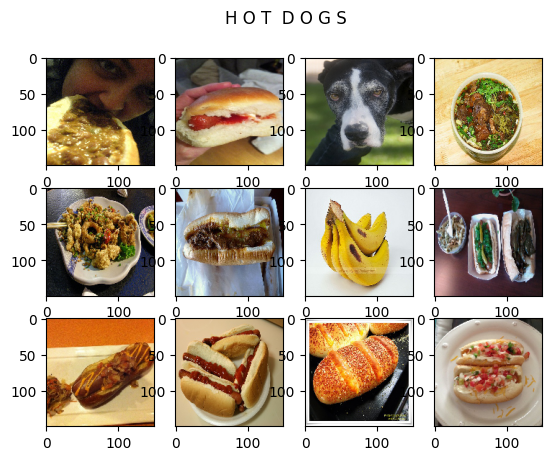

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4)  # Se crea una cuadrícula de 3 filas y 4 columnas para mostrar 12 figuras
fig.suptitle('H O T  D O G S')

# Mostrar las 12 figuras
axes[0, 0].imshow(batch_example[0])
axes[0, 1].imshow(batch_example[1])
axes[0, 2].imshow(batch_example[2])
axes[0, 3].imshow(batch_example[3])
axes[1, 0].imshow(batch_example[4])
axes[1, 1].imshow(batch_example[5])
axes[1, 2].imshow(batch_example[6])
axes[1, 3].imshow(batch_example[7])
axes[2, 0].imshow(batch_example[8])
axes[2, 1].imshow(batch_example[9])
axes[2, 2].imshow(batch_example[10])
axes[2, 3].imshow(batch_example[11])

plt.show()


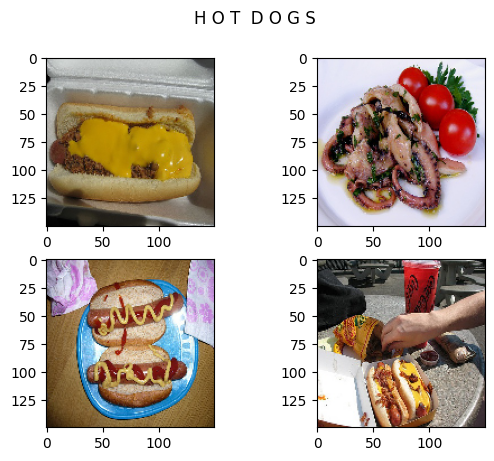

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2)
fig.suptitle('H O T  D O G S ')

axes[0, 0].imshow(batch_example[0])
axes[0, 1].imshow(batch_example[5])
axes[1, 0].imshow(batch_example[9])
axes[1, 1].imshow(batch_example[3])

plt.show()

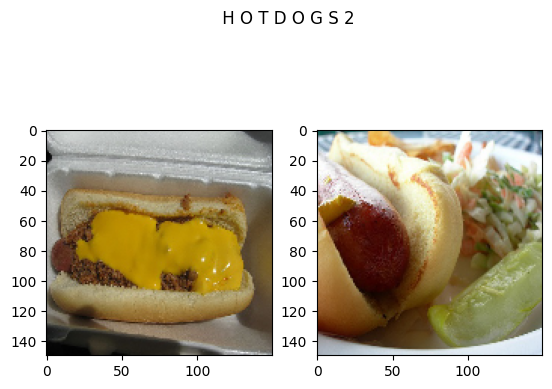

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(' H O T D O G S 2')
ax1.imshow(batch_example[0]);
ax2.imshow(batch_example[2]);

# ***RED 1 : Creamos Una Red Y Usamos los siguientes Generadores***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
len(Train_generator) , len(Validation_generator)

(233, 233)

Antes de ejecutar nuestra red, mostraremos el progreso y los resultados de un modelo de aprendizaje profundo en 10 épocas. Aquí está el significado de cada línea:

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="modelCustom",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(
      Train_generator,
      steps_per_epoch=233,
      epochs=10,
      validation_data=Validation_generator,
      validation_steps=233 ,
      callbacks=[model_checkpoint_callback])

Epoch 1/10
233/233 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.4955

233/233 [==============================] - 45s 195ms/step - loss: 0.6935 - accuracy: 0.4955 - val_loss: 0.6940 - val_accuracy: 0.5011
Epoch 2/10
233/233 [==============================] - 46s 197ms/step - loss: 0.6939 - accuracy: 0.4869 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 3/10
233/233 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4918

233/233 [==============================] - 45s 194ms/step - loss: 0.6932 - accuracy: 0.4918 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 4/10
233/233 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.5151

233/233 [==============================] - 45s 193ms/step - loss: 0.6927 - accuracy: 0.5151 - val_loss: 0.6605 - val_accuracy: 0.5230
Epoch 5/10
233/233 [==============================] - 44s 189ms/step - loss: 0.6930 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 6/10
233/233 [==============================] - 43s 183ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
233/233 [==============================] - 43s 184ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
233/233 [==============================] - 43s 186ms/step - loss: 0.6932 - accuracy: 0.4935 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 9/10
233/233 [==============================] - 44s 189ms/step - loss: 0.6932 - accuracy: 0.4931 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 10/10
233/233 [==============================] - 44s 189ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.

La red neuronal se entrena en lotes de datos (batches). En cada época, se realizan 233 pasos de entrenamiento (233/233) y se utiliza un generador de datos llamado Train_generator para alimentar los datos de entrenamiento a la red neuronal.
El modelo se compila con una función de pérdida (loss) y una métrica de precisión (accuracy). En este caso, la función de pérdida es loss: 0.6935 y la precisión alcanzada es accuracy: 0.4955.
Durante el entrenamiento, se imprime el progreso en cada época, mostrando la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación. Por ejemplo, en la primera época, se obtiene una pérdida de validación (val_loss) de 0.6940 y una precisión de validación (val_accuracy) de 0.5011.
Se utilizan callbacks en el entrenamiento. En este caso, se proporciona model_checkpoint_callback como callback. Los callbacks son funciones que se ejecutan en determinados momentos durante el entrenamiento, como después de cada época o cuando se alcanza cierta precisión. En este caso, parece ser un callback para guardar el modelo después de cada época.

In [ ]:
!zip -r modelCustom.zip modelCustom

  adding: modelCustom/ (stored 0%)
  adding: modelCustom/assets/ (stored 0%)
  adding: modelCustom/keras_metadata.pb (deflated 92%)
  adding: modelCustom/fingerprint.pb (stored 0%)
  adding: modelCustom/saved_model.pb (deflated 88%)
  adding: modelCustom/variables/ (stored 0%)
  adding: modelCustom/variables/variables.data-00000-of-00001 (deflated 32%)
  adding: modelCustom/variables/variables.index (deflated 65%)


# ***Visualizando Las Curvas de Entrenamiento***

Utilizamos  la biblioteca matplotlib para trazar gráficos de la precisión (accuracy) y la pérdida (loss) del modelo durante el entrenamiento. Aquí está el significado de cada línea:

<ipython-input-47-ac76c9802a4e>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', color = "red", label='Training acc')
<ipython-input-47-ac76c9802a4e>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b',color = "red" ,label='Training loss')


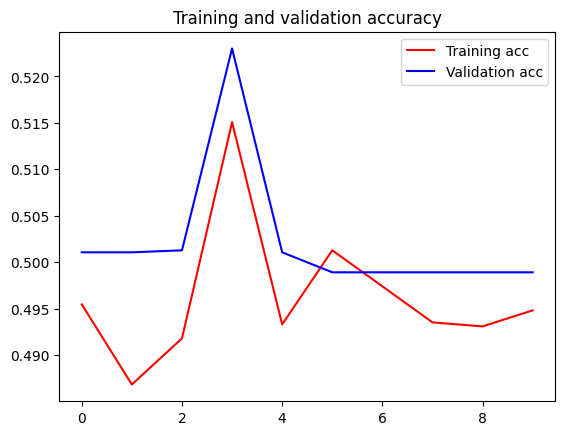

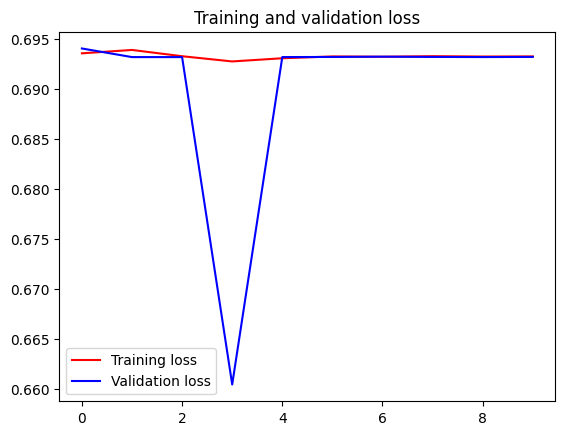

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', color = "red", label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b',color = "red" ,label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

En resumen, este código genera dos gráficos: uno para mostrar la evolución de la precisión durante el entrenamiento y la validación, y otro para mostrar la evolución de la pérdida durante el entrenamiento y la validación. Estos gráficos pueden proporcionar información sobre cómo el modelo está aprendiendo y generalizando a lo largo de las épocas.

# RED 2 : **Creando** Otra Red Con Transfer Learning Y Usando Los Generadores

En esta parte ingresamos líneas de código que importaran diferentes elementos y modelos de TensorFlow para su uso en la construcción de modelos de redes neuronales.

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model

In [ ]:
basemodel = ResNet50(weights = 'imagenet' , include_top = False , input_tensor = Input(shape = (150,150,3)))
#basemodel = VGG16(weights = 'imagenet' , include_top = False , input_tensor = Input(shape = input_shape))

94765736/94765736 [==============================] - 3s 0us/step


Veamos un resumen de la Red:

In [ ]:
headmodel = basemodel.output
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(128 , activation = 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(1 , activation = 'sigmoid')(headmodel)

In [ ]:
model = Model(inputs = basemodel.input , outputs = headmodel)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
len(Train_generator) , len(Validation_generator)

(233, 233)

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="modeldos",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(
      Train_generator,
      steps_per_epoch=233,
      epochs=10,
      validation_data=Validation_generator,
      validation_steps=233 ,
      callbacks=[model_checkpoint_callback])

Epoch 1/10
233/233 [==============================] - ETA: 0s - loss: 1.3071 - accuracy: 0.5689

233/233 [==============================] - 128s 365ms/step - loss: 1.3071 - accuracy: 0.5689 - val_loss: 0.6928 - val_accuracy: 0.5150
Epoch 2/10
233/233 [==============================] - ETA: 0s - loss: 0.6368 - accuracy: 0.6409

233/233 [==============================] - 82s 352ms/step - loss: 0.6368 - accuracy: 0.6409 - val_loss: 0.6997 - val_accuracy: 0.5419
Epoch 3/10
233/233 [==============================] - 73s 314ms/step - loss: 0.5419 - accuracy: 0.7193 - val_loss: 0.6823 - val_accuracy: 0.5060
Epoch 4/10
233/233 [==============================] - ETA: 0s - loss: 0.5900 - accuracy: 0.7016

233/233 [==============================] - 82s 353ms/step - loss: 0.5900 - accuracy: 0.7016 - val_loss: 0.6400 - val_accuracy: 0.6741
Epoch 5/10
233/233 [==============================] - 54s 233ms/step - loss: 0.5563 - accuracy: 0.7152 - val_loss: 0.9558 - val_accuracy: 0.5000
Epoch 6/10
233/233 [==============================] - ETA: 0s - loss: 0.5039 - accuracy: 0.7430

233/233 [==============================] - 80s 345ms/step - loss: 0.5039 - accuracy: 0.7430 - val_loss: 0.4235 - val_accuracy: 0.8014
Epoch 7/10
233/233 [==============================] - 55s 237ms/step - loss: 0.4811 - accuracy: 0.7568 - val_loss: 0.5911 - val_accuracy: 0.6651
Epoch 8/10
233/233 [==============================] - 54s 231ms/step - loss: 0.4804 - accuracy: 0.7600 - val_loss: 0.4346 - val_accuracy: 0.7951
Epoch 9/10
233/233 [==============================] - 54s 234ms/step - loss: 0.4133 - accuracy: 0.8031 - val_loss: 0.4407 - val_accuracy: 0.7788
Epoch 10/10
233/233 [==============================] - 73s 315ms/step - loss: 0.3767 - accuracy: 0.8206 - val_loss: 0.6749 - val_accuracy: 0.7195


zip -r nombredelarchivo.zip nombredelacarpetadelmodelo

In [ ]:
!zip -r modeldos.zip modeldos

  adding: modeldos/ (stored 0%)
  adding: modeldos/assets/ (stored 0%)
  adding: modeldos/keras_metadata.pb (deflated 96%)
  adding: modeldos/fingerprint.pb (stored 0%)
  adding: modeldos/saved_model.pb (deflated 92%)
  adding: modeldos/variables/ (stored 0%)
  adding: modeldos/variables/variables.data-00000-of-00001 (deflated 14%)
  adding: modeldos/variables/variables.index (deflated 79%)


Visualizando Las Curvas de Entrenamiento

<ipython-input-58-f3e9d89fe5ac>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', color = "green", label='Training acc')
<ipython-input-58-f3e9d89fe5ac>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b',color = "orange" ,label='Training loss')


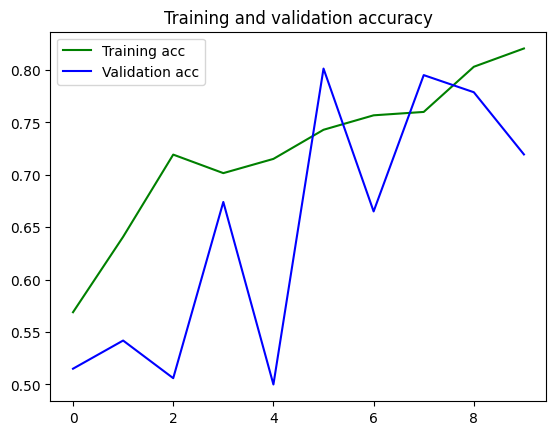

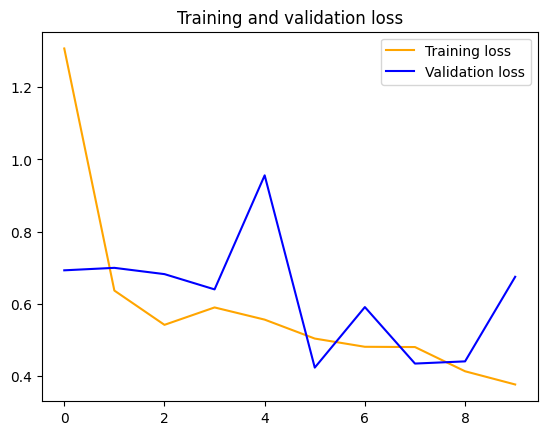

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', color = "green", label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b',color = "orange" ,label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Cargando El Mejor Modelo

In [ ]:
Hotdogs_model = tf.keras.models.load_model('modelResnet')

Hacemos Predicciones con el Generador de Testing


In [ ]:
y_test = Test_generator.classes
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = Hotdogs_model.predict(Test_generator)
predictions

233/233 [==============================] - 2588s 11s/step


array([[0.49059308],
       [0.1103253 ],
       [0.10722875],
       ...,
       [0.40204862],
       [0.9038231 ],
       [0.66982746]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
preds = np.round(predictions).squeeze()
preds

array([0., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      2321
           1       0.82      0.69      0.75      2321

    accuracy                           0.77      4642
   macro avg       0.78      0.77      0.77      4642
weighted avg       0.78      0.77      0.77      4642



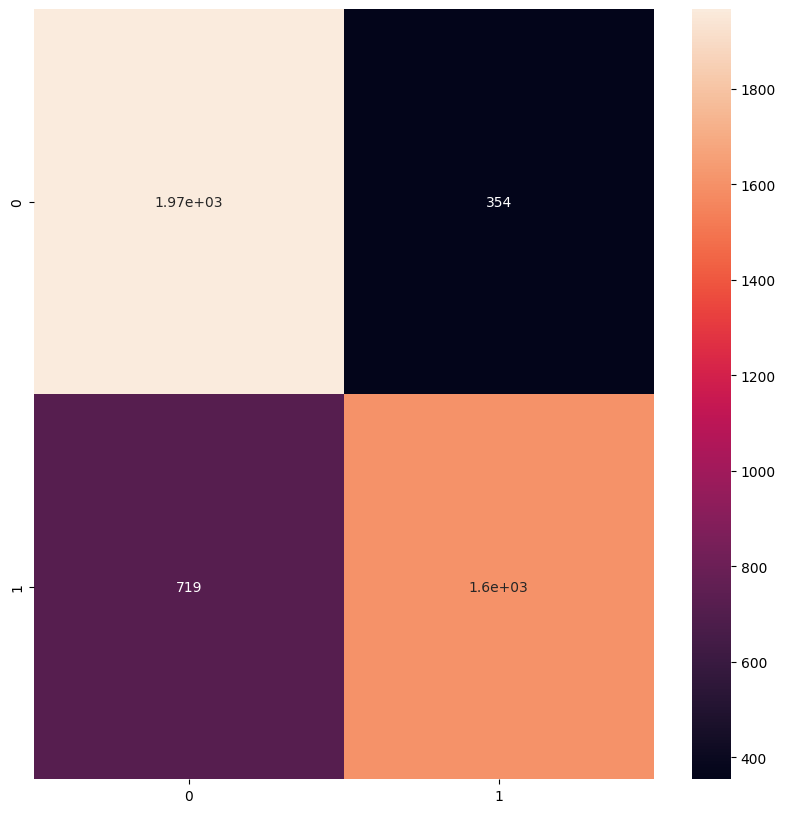

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, preds)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True , fmt='.3g');